In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# 获取数据

In [2]:
dataset = load_diabetes()

In [3]:
dataset.data.shape, dataset.target.shape

((442, 10), (442,))

In [4]:
dataset.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

# 划分数据集

In [5]:
x_train, x_val, y_train, y_val = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

In [6]:
y_train.shape, y_val.shape

((353,), (89,))

<AxesSubplot: ylabel='Density'>

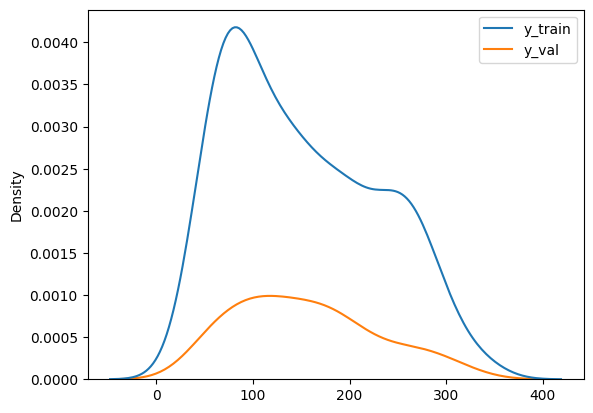

In [7]:
# 数组传值没法正确显示label
sns.kdeplot({"y_train": y_train, "y_val": y_val})

# 特征值标准化

In [8]:
scaler = StandardScaler()

In [9]:
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [10]:
x_train[0], x_train_scaled[0]

(array([ 0.01264814,  0.05068012,  0.00241654,  0.0563009 ,  0.02732605,
         0.01716188,  0.04127682, -0.03949338,  0.00370906,  0.07348023]),
 array([ 0.24396182,  1.02582922,  0.06364526,  1.21073305,  0.59073628,
         0.38324757,  0.87925828, -0.83072415,  0.07510266,  1.49297091]))

# 训练

In [31]:
estimator = SGDRegressor()

In [32]:
estimator.fit(x_train_scaled, y_train)

SGDRegressor()

In [33]:
# 得分很低,因为不是分类,是回归
estimator.score(x_val_scaled, y_val)

0.3244726358285428

In [34]:
# 使用不正则化数据分数更低
estimator.score(x_val, y_val)

0.0366162602574539

# 误差评估

In [35]:
y_predict_scaled = estimator.predict(x_val_scaled)
y_predict_scaled[:10]

array([236.92101975, 249.79224555, 163.39068793, 121.1211725 ,
       185.72683897, 259.75027239, 112.95888788, 187.14881819,
       156.01381049, 233.81945431])

<AxesSubplot: ylabel='Density'>

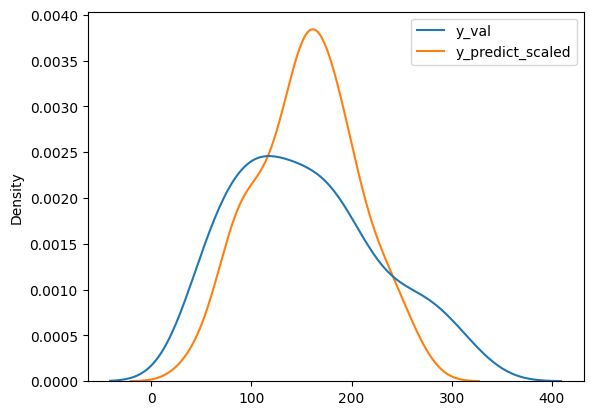

In [36]:
sns.kdeplot({"y_val": y_val, "y_predict_scaled": y_predict_scaled})

In [37]:
mean_squared_error(y_val, y_predict_scaled)

3464.0550298446087

In [38]:
y_predict = estimator.predict(x_val)
y_predict[:10]

array([155.57966923, 156.21798415, 151.99350839, 149.96053239,
       153.07405924, 156.71793591, 149.57083107, 153.18173517,
       151.64489424, 155.43837136])

<AxesSubplot: ylabel='Density'>

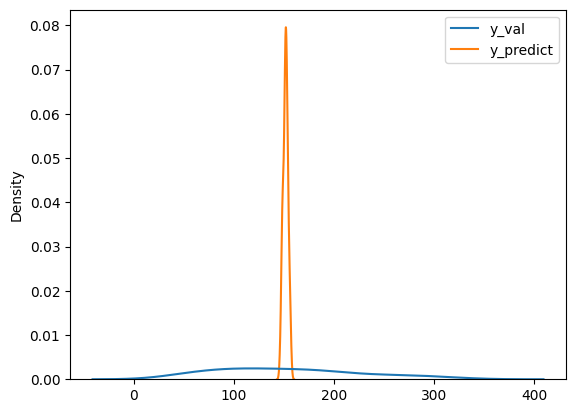

In [42]:
sns.kdeplot({"y_val": y_val, "y_predict": y_predict})

In [43]:
mean_squared_error(y_val, y_predict)

4940.161518725169